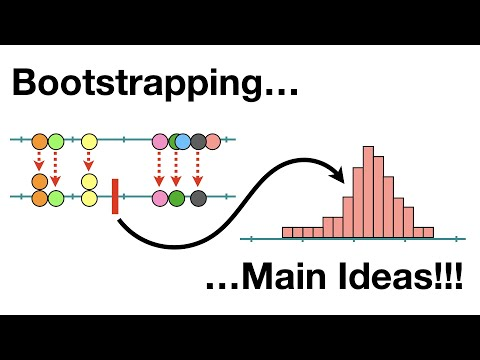

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1) Standard deviation of the original data referrs to the average spread of the original data through calculating the distance from the mean. Standard error of the mean indicates the precision of the mean of our data. The standard error of the mean represents fluxuation from the population data, while standard deviation represents natural variability within the population's individual data points. The standard error of the mean can utilize the standard deviation of the mean to calculate it, and is represented by s/sqrt(n) with s being the standard deviation, and n being the sample size. 

2. In order to create an interval which covers about 95% of the bootstrapped sample mean, you should take the sample mean, and then encompass a radius of 2x the standard error. 

CI = $$\text{Sample Mean} \pm (Z \times SE)$$

3. In order to create a 95% confidence interval, identify the 2.5th percentile and the 97.5th percentile of your graphed means. Your 95% confidence interval is between [2.5, 97.5] as your upper and lower bounds. 

95% Bootstrap Confidence Interval for Population Mean: (14.455327150281498, 15.125702972880388)
95% Bootstrap Confidence Interval for Population Median: (14.397792608821423, 15.221845179419732)


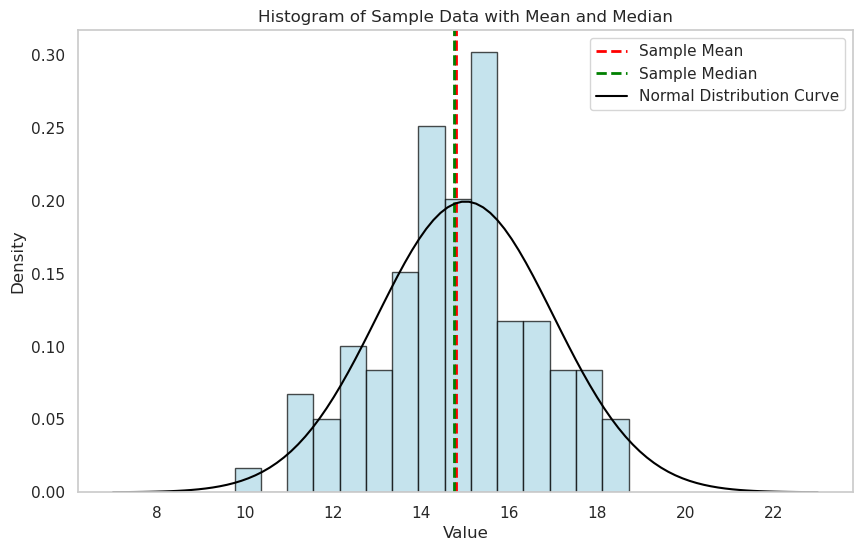

In [12]:
# QUESTION 4 
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Simulate sample data using a normal distribution (bell curve)
mean = 15  # Mean of the normal distribution
std_dev = 2  # Standard deviation of the normal distribution
sample_data = np.random.normal(loc=mean, scale=std_dev, size=100)

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap=1000, alpha=0.05, statistic=np.mean):
    """
    Calculate the bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The input sample data (array-like).
    - num_bootstrap: The number of bootstrap samples to generate.
    - alpha: Significance level for confidence interval (default is 0.05 for 95% CI).
    - statistic: The statistic to compute (default is mean).
    
    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """
    # Create an array to store bootstrap sample statistics
    bootstrap_samples = np.empty(num_bootstrap)
    
    # Generate bootstrap samples and compute the statistic for each sample
    for i in range(num_bootstrap):
        # Resample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_samples[i] = statistic(sample)  # Calculate the statistic (mean or median)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_samples, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_samples, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data, num_bootstrap=1000, alpha=0.05, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for Population Mean: {mean_ci}")

# To calculate the 95% bootstrap confidence interval for the population median,
# simply change the statistic parameter to np.median.
median_ci = bootstrap_ci(sample_data, num_bootstrap=1000, alpha=0.05, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for Population Median: {median_ci}")

# Optional: Visualize the sample data with mean and median lines
plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=15, color='lightblue', edgecolor='black', alpha=0.7, density=True)
plt.axvline(np.mean(sample_data), color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(np.median(sample_data), color='green', linestyle='dashed', linewidth=2, label='Sample Median')

# Plot the bell curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, y, color='black', label='Normal Distribution Curve')

plt.title('Histogram of Sample Data with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()



5. It is important to distinguish between the two since a population parameter is a characteristic of the entire population, whereas the sample statistic is a calculation which is attempting to estimate the population characteristic. Ultimately it is important to distinguish between the two in order to accurately interpret results, using the sample statistic is subject to being variable and errors, whereas the population parameter is a constant. 

6.1. In order to bootstrap, you take an initial sample data, and then resample using replacement. The resulting data is the bootstrapped data, you take the data and use it for a computation, and log the calculation. The last step of bootstrapping is to repeat multiple times (usually thousands of times). 

6.2. The main purpose of bootstrapping is to estimate the distribution of your sampling without knowing the underlying distribution, or when your sample size is small. Bootstrapping can also be useful in estimating your standard error and calculating the confidence interval of your calculated statistics.  

6.3. You can use bootstrapping to create a confidence interval in order to calculate whether or not you should accept or reject your hypothesis. 

7.The confidence overlapping zero means that zero would be a possible value for the population data, which means that there isn't enough data to determine if the observed effect is significant. The confidence interval represents the range of possible values as a result of sampling variability and uncertanty, overlapping with zero would mean that the observed sample mean could actually be a result of random variability rather than a true effect. The opposite conclusion of failing to reject the null hypothesis would be to show that the data is statistically significant, showing that the data showed a noticable difference which can be accounted for by the observed change, rather than variability in sampling. 

8.

**Problem Introduction**: 
    
The new vaccine developed by AliTech aims to improve the health outcomes of individuals who recieve it. This report analyzes data collected from patients to determine whether the vaccine significantly improves health scores. 
    
The null hypothesis is that the final health score of the patient did not statistically improve after taking the new AliTech vaccine. 

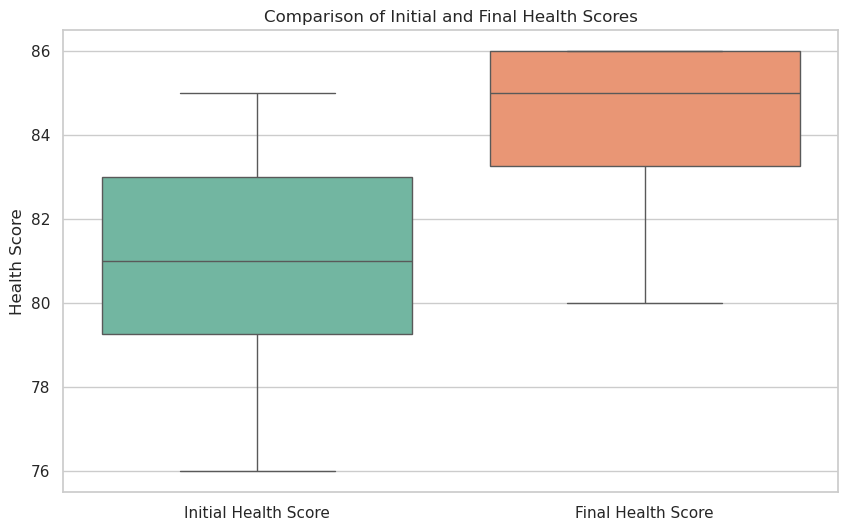

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('patient_data.csv')

# Create a new column for the difference in health scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot to compare Initial and Final Health Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['InitialHealthScore'], data['FinalHealthScore']], 
            palette='Set2')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()  # Remove renderer argument


In [14]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Calculate the differences in health scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping
n_iterations = 10000
boot_means = []

for _ in range(n_iterations):
    boot_sample = data['HealthScoreChange'].sample(frac=1, replace=True)
    boot_means.append(boot_sample.mean())

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

mean_change = data['HealthScoreChange'].mean()
print(f'Mean Change in Health Score: {mean_change}')
print(f'95% Confidence Interval: ({lower_bound}, {upper_bound})')


Mean Change in Health Score: 3.3
95% Confidence Interval: (0.9, 5.6)


**Qualitative Analysis**: 

Bootstrapping: We are using resampling with replacement in order to create a sample distribution statistic. Through calculating the 95% confidence interval for our mean change, we can later understand our data better. 

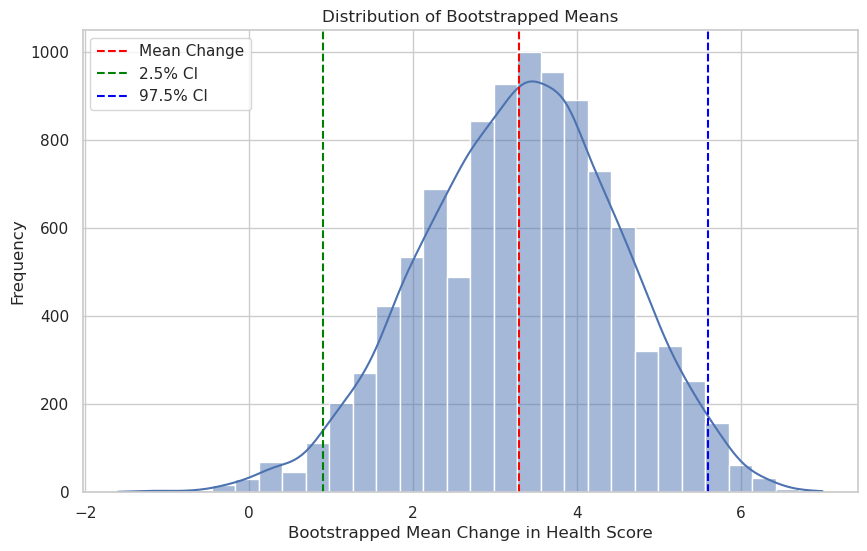

In [15]:
# Plot the distribution of bootstrapped means
plt.figure(figsize=(10, 6))
sns.histplot(boot_means, bins=30, kde=True)
plt.axvline(mean_change, color='red', linestyle='--', label='Mean Change')
plt.axvline(lower_bound, color='green', linestyle='--', label='2.5% CI')
plt.axvline(upper_bound, color='blue', linestyle='--', label='97.5% CI')
plt.title('Distribution of Bootstrapped Means')
plt.xlabel('Bootstrapped Mean Change in Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Findings and Discussion**: 
   
Looking at our 95% confidence interval, it does not include zeor which allows us to conclude that we failed to reject the null hypothesis. Thi suggests that the vaccine may be effective in improving health scores


**Further Considerations**:

Due to our smaller sample size, and relatively small age range our data may be skewed for specifically the tested age range. 

Potential improvements is to increase samping size and utilize more efficient data analysis techniques with greater confidence intervals. 

9. Yes

**CHAT SUMMARY:**

In our chat, we discussed how to approach the AliTech vaccine data analysis assignment, focusing on evaluating the effectiveness of the vaccine through bootstrapping and visualizations. Key steps included:

1. **Problem Introduction**: You need to analyze health scores before and after the vaccine and determine if the vaccine is effective.
2. **Null Hypothesis**: The null hypothesis assumes "no effect" of the vaccine, meaning no significant difference in health scores.
3. **Data Visualization**: We created boxplots comparing the initial and final health scores, with code to set the y-axis limit at 100.
4. **Bootstrapping Methodology**: We implemented bootstrapping to compute a 95% confidence interval for the mean change in health scores using resampling techniques.
5. **Findings**: Bootstrapping provides insight into whether we should reject the null hypothesis based on the confidence interval not overlapping zero.
6. **Supporting Visualizations**: A histogram of bootstrapped means was used to visually assess the distribution and confidence interval of the health score changes.
7. **Conclusion**: If the confidence interval excludes zero, we may conclude that the vaccine has an effect.

We also emphasized the importance of reproducibility by using a random seed and discussed how to handle sample data visualization in a GitHub repository-friendly format.

**CHAT LINK:**

https://chatgpt.com/share/66fdef0e-7c60-800c-8241-0bfd96af133e